In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

## Pepare Dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images_mlp = train_images.reshape((60000, 28*28))
test_images_mlp = test_images.reshape((10000, 28*28))

## MLP Model

In [ ]:
# Base model
inputs = layers.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_mlp = keras.Model(inputs=inputs, outputs=outputs)
model_mlp.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

model_mlp.summary()

In [40]:
# Smaller model
# Added L2 regularizer
# Added Dropout layers
from tensorflow.keras import optimizers

inputs = layers.Input(shape=(784,))
x = layers.Dense(110, activation='relu', kernel_regularizer=regularizers.l2(0.002))(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.002))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_mlp_2= keras.Model(inputs=inputs, outputs=outputs)
model_mlp_2.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

model_mlp.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_26 (Dense)            (None, 110)               86350     
                                                                 
 dropout_3 (Dropout)         (None, 110)               0         
                                                                 
 dense_27 (Dense)            (None, 60)                6660      
                                                                 
 dropout_4 (Dropout)         (None, 60)                0         
                                                                 
 dense_28 (Dense)            (None, 30)                1830      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0   

In [ ]:
keras.utils.plot_model(model_mlp, "model_mlp.png", show_shapes=True)

In [10]:
model_mlp.save("model_mlp.keras")

## CNN Model

In [20]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_cnn = keras.Model(inputs=inputs, outputs=outputs)
model_cnn.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

model_cnn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [ ]:
keras.utils.plot_model(model_cnn, "model_cnn.png", show_shapes=True)

In [11]:
model_cnn.save("model_cnn.keras")

## Train MLP Model

In [41]:
history_mlp = model_mlp_2.fit(train_images_mlp, train_labels,
                                     epochs=15, batch_size=128,
                                     validation_data=(test_images_mlp, test_labels))

Epoch 1/15
469/469 [==============================] - 4s 6ms/step - loss: 0.9687 - accuracy: 0.8066 - val_loss: 0.6785 - val_accuracy: 0.8847
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.8083 - accuracy: 0.8569 - val_loss: 0.6010 - val_accuracy: 0.9126
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.7917 - accuracy: 0.8625 - val_loss: 0.7344 - val_accuracy: 0.8656
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.7803 - accuracy: 0.8630 - val_loss: 0.7326 - val_accuracy: 0.8689
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.7816 - accuracy: 0.8623 - val_loss: 0.6942 - val_accuracy: 0.8880
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.7773 - accuracy: 0.8651 - val_loss: 0.6096 - val_accuracy: 0.9047
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.7708 - accuracy: 0.8649 - val_loss: 0.6234 - val_accuracy: 0.9021
Epoch 

## Train CNN Model

In [21]:
history_cnn = model_cnn.fit(train_images, train_labels,
                            epochs=15, batch_size=128,
                            validation_data=(test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 7s 13ms/step - loss: 0.2139 - accuracy: 0.9343 - val_loss: 0.0545 - val_accuracy: 0.9815
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0301 - val_accuracy: 0.9896
Epoch 4/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0267 - accuracy: 0.9919 - val_loss: 0.0301 - val_accuracy: 0.9909
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0279 - val_accuracy: 0.9916

In [14]:
model_mlp.evaluate(test_images_mlp, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.0979


[0.09611277282238007, 0.09790000319480896]

In [15]:
model_cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0287 - accuracy: 0.0981


[0.0286877378821373, 0.09809999912977219]

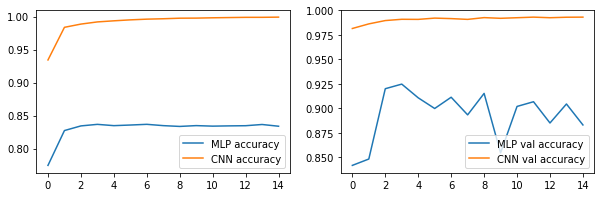

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(history_mlp.history['accuracy'], label="MLP accuracy")
ax[0].plot(history_cnn.history['accuracy'], label="CNN accuracy")
ax[0].legend()

ax[1].plot(history_mlp.history['val_accuracy'], label="MLP val accuracy")
ax[1].plot(history_cnn.history['val_accuracy'], label="CNN val accuracy")
ax[1].legend()

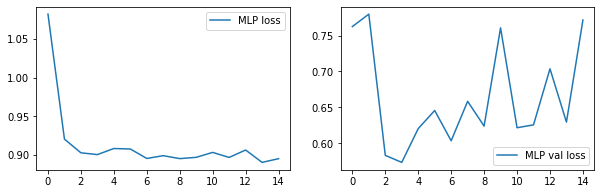

In [39]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(history_mlp.history['loss'], label="MLP loss")
# ax[0].plot(history_cnn.history['loss'], label="CNN loss")
ax[0].legend()

ax[1].plot(history_mlp.history['val_loss'], label="MLP val loss")
# ax[1].plot(history_cnn.history['val_loss'], label="CNN val loss")
ax[1].legend()